In [202]:
import csv
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [203]:
def load_data(filepath):
    lst = []
    with open(filepath) as file:
        reader = csv.DictReader(file)
        for row in reader:
            lst.append(row)
    return lst

In [204]:
data = load_data('Pokemon.csv')
info = data[0]

info

len(data)

800

In [205]:
n = len(data)

In [206]:
def calc_features(row):
    x1 = int(row['Attack'])
    x2 = int(row['Sp. Atk'])
    x3 = int(row['Speed'])
    x4 = int(row['Defense'])
    x5 = int(row['Sp. Def'])
    x6 = int(row['HP'])
    return np.array((x1,x2,x3,x4,x5,x6)).reshape(6,)

In [207]:

def load_data(filepath):
    lst = []
    with open(filepath) as file:
        reader = csv.DictReader(file)
        for row in reader:
            lst.append(row)
    return lst

def calc_features(row):
    x1 = int(row['Attack'])
    x2 = int(row['Sp. Atk'])
    x3 = int(row['Speed'])
    x4 = int(row['Defense'])
    x5 = int(row['Sp. Def'])
    x6 = int(row['HP'])
    return np.array((x1,x2,x3,x4,x5,x6)).reshape(6,)

In [208]:
X = [calc_features(row) for row in load_data('Pokemon.csv')][:4]
X

[array([49, 65, 45, 49, 65, 45]),
 array([62, 80, 60, 63, 80, 60]),
 array([ 82, 100,  80,  83, 100,  80]),
 array([100, 122,  80, 123, 120,  80])]

In [225]:
Z = linkage(X, method="complete")
Z

array([[  0.        ,   1.        ,  35.56683849,   2.        ],
       [  2.        ,   3.        ,  52.9905652 ,   2.        ],
       [  4.        ,   5.        , 129.61867149,   4.        ]])

In [243]:
X = [calc_features(row) for row in load_data('Pokemon.csv')][:4]
X

[array([49, 65, 45, 49, 65, 45]),
 array([62, 80, 60, 63, 80, 60]),
 array([ 82, 100,  80,  83, 100,  80]),
 array([100, 122,  80, 123, 120,  80])]

In [274]:

def load_data(filepath):
    lst = []
    with open(filepath) as file:
        reader = csv.DictReader(file)
        for row in reader:
            lst.append(row)
    return lst

def calc_features(row):
    x1 = int(row['Attack'])
    x2 = int(row['Sp. Atk'])
    x3 = int(row['Speed'])
    x4 = int(row['Defense'])
    x5 = int(row['Sp. Def'])
    x6 = int(row['HP'])
    return np.array((x1,x2,x3,x4,x5,x6)).reshape(6,)

def dist(c1, c2, dataset, dist_matrix=None):
    max = 0
    if dist_matrix is None:
        for p1 in c1:
            for p2 in c2:
                temp = np.linalg.norm(np.array(dataset[p1])-np.array(dataset[p2]))
                if temp > max:
                    max = temp
    else:
        for p1 in c1:
            for p2 in c2:
                temp = dist_matrix[p1][p2]
                if temp > max:
                    max = temp
    return max

def update_dist(new_C, updated_dist, dist_matrix, clusters, new_clusters):
    for i in range(new_C):
        if i in new_clusters[new_C] or clusters[i] != -1:
            continue
        l1 = []
        if i in new_clusters.keys():
            l1 = new_clusters[i]
        else:
            l1 = [i]
        updated_dist[i][new_C] = updated_dist[new_C][i] = dist(l1, new_clusters[new_C], None, dist_matrix)
        
def hac(dataset):
    # update distance between each point (initial cluster)
    dist_matrix = np.ones((len(dataset)*2-1, len(dataset)*2-1)) * np.inf
    updated_dist = np.ones((len(dataset)*2-1, len(dataset)*2-1)) * np.inf
    for i in range(len(dataset)-1):
        for j in range(i+1, len(dataset)):
            dist_matrix[i][j] = dist_matrix[j][i] = dist([i],[j],dataset)
            updated_dist[i][j] = updated_dist[j][i] = dist([i],[j],dataset)
    clusters = {}
    for i in range(len(dist_matrix)):
        clusters[i] = -1
    
    new_clusters = {}
    # {5: [0, 1], 6: [2, 3], 7: [5, 4]}
    new_C = len(dataset)
    Z = []
    while new_C <= 2*len(dataset)-1:
        i, j = np.unravel_index(np.argmin(updated_dist, axis=None), updated_dist.shape)
        d = updated_dist[i][j]
        updated_dist[i][j] = updated_dist[j][i] = np.inf
        l1 = [i]
        l2 = [j]
        if i in new_clusters.keys():
            l1 = new_clusters[i]
        if j in new_clusters.keys():
            l2 = new_clusters[j]
        new_l = l1.copy()
        new_l.extend(l2)
        new_clusters[new_C] = new_l
        for x in new_l:
            clusters[x] = new_C
        update_dist(new_C, updated_dist, dist_matrix, clusters, new_clusters)
        print(np.array([i, j, d, len(new_l)]))
        Z.append([i, j, d, len(new_l)])
        new_C += 1
        
    return np.array(Z)

In [278]:
X

[array([49, 65, 45, 49, 65, 45]),
 array([62, 80, 60, 63, 80, 60]),
 array([ 82, 100,  80,  83, 100,  80]),
 array([100, 122,  80, 123, 120,  80])]

In [415]:
#helper
def dist(c1, c2, points1, points2, dataset, dist_matrix=None):
    max = 0
    if dist_matrix is None:
        return np.linalg.norm(np.array(dataset[c1])-np.array(dataset[c2]))
    else:
        i = j = -1
        dup = []
        for x in points1:
            for y in points2:
                temp = dist_matrix[x][y][0]
                if temp > max:
                    max = temp
                    dup = []
                    i = x
                    j = y
                elif temp == max:
                    if (i, j) not in dup:
                        dup.append((i, j))
                    dup.append((x, y))
        if len(dup)==0:
            dist_matrix[c1][c2][1] = dist_matrix[c2][c1][1] = (i,j)    
        else:
            dup.sort()
            dist_matrix[c1][c2][1] = dist_matrix[c2][c1][1] = dup[0]
    return max
#helper
def update_dist(new_C, dist_matrix, clusters, new_clusters):
    for c in clusters:
        l1 = []
        if c in new_clusters.keys():
            l1 = new_clusters[c]
        else:
            l1 = [c]
        dist_matrix[c][new_C] = dist_matrix[new_C][c] = dist(l1, new_clusters[new_C], None, dist_matrix)

#helper
def get_closest(clusters, dist_matrix):
    min = np.inf
    c1 = c2 = -1
    for i in range(len(clusters)-1):
        for j in range(i+1, len(clusters)):
            d = dist_matrix[clusters[i]][clusters[j]]
            if min > d:
                min = d
                c1, c2 = clusters[i], clusters[j]
    return c1, c2
                

def hac(dataset):
    # update distance between each point (initial cluster)
    
    dist_matrix = np.ones((len(dataset)*2-1, len(dataset)*2-1)) * np.inf
    for i in range(len(dataset)-1):
        for j in range(i+1, len(dataset)):
            dist_matrix[i][j] = dist_matrix[j][i] = dist([i],[j],dataset)

    clusters = [i for i in range(len(dataset))]
        
    new_clusters = {}
    # {5: [0, 1], 6: [2, 3], 7: [5, 4]}
    new_C = len(dataset)
    Z = []
    while len(clusters)>1:
        i, j = get_closest(clusters, dist_matrix)
        d = dist_matrix[i][j]
        l1 = [i]
        l2 = [j]
        if i in new_clusters.keys():
            l1 = new_clusters[i]
        if j in new_clusters.keys():
            l2 = new_clusters[j]
        new_l = l1.copy()
        new_l.extend(l2)
        new_clusters[new_C] = new_l
        clusters.remove(i)
        clusters.remove(j)
        update_dist(new_C, dist_matrix, clusters, new_clusters)
        clusters.append(new_C)
        Z.append([i, j, d, len(new_l)])
        new_C += 1
    return np.array(Z)

In [481]:
def dist(c1, c2, points1, points2, dataset, dist_matrix=None):
    max = 0
    if dist_matrix is None:
        return np.linalg.norm(np.array(dataset[c1])-np.array(dataset[c2]))
    else:
        i = j = -1
        dup = []
        for x in points1:
            for y in points2:
                temp = dist_matrix[x][y][0]
                if temp > max:
                    max = temp
                    dup = []
                    i = x
                    j = y
                elif temp == max:
                    if (i, j) not in dup:
                        dup.append((i, j))
                    dup.append((x, y))
        if len(dup)==0:
            dist_matrix[c1][c2][1] = dist_matrix[c2][c1][1] = (i,j)    
        else:
            dup.sort()
            dist_matrix[c1][c2][1] = dist_matrix[c2][c1][1] = dup[0]
    return max

def update_dist(new_C, dist_matrix, clusters, new_clusters):
    for c in clusters:
        l1 = []
        if c in new_clusters.keys():
            l1 = new_clusters[c]
        else:
            l1 = [c]
        dist_matrix[c][new_C][0] = dist_matrix[new_C][c][0] = dist(c, new_C, l1, new_clusters[new_C], None, dist_matrix)

def get_closest(clusters, dist_matrix):
    min = np.inf
    c1 = c2 = -1
    for i in range(len(clusters)-1):
        for j in range(i+1, len(clusters)):
            d = dist_matrix[clusters[i]][clusters[j]][0]
            if min > d:
                min = d
                c1, c2 = clusters[i], clusters[j]
            elif min == d:
                if dist_matrix[c1][c2][1] > dist_matrix[clusters[i]][clusters[j]][1]:
                    c1 = clusters[i]
                    c2 = clusters[j]
    return c1, c2

def hac(dataset):
    # update distance between each point (initial cluster)
    dist_matrix = [[[np.inf, (-1, -1)] for i in range(len(dataset)*2-1)] for j in range(len(dataset)*2-1)]
    for i in range(len(dataset)-1):
        for j in range(i+1, len(dataset)):
            dist_matrix[i][j][0] = dist_matrix[j][i][0] = dist(i,j,None, None,dataset)
            dist_matrix[i][j][1] = dist_matrix[j][i][1] = (i, j)

    clusters = [i for i in range(len(dataset))]
        
    new_clusters = {}
    # {5: [0, 1], 6: [2, 3], 7: [5, 4]}
    new_C = len(dataset)
    Z = []
    while len(clusters)>1:
        i, j = get_closest(clusters, dist_matrix)
        d = dist_matrix[i][j][0]
        l1 = [i]
        l2 = [j]
        if i in new_clusters.keys():
            l1 = new_clusters[i]
        if j in new_clusters.keys():
            l2 = new_clusters[j]
        new_l = l1.copy()
        new_l.extend(l2)
        new_clusters[new_C] = new_l
        clusters.remove(i)
        clusters.remove(j)
        update_dist(new_C, dist_matrix, clusters, new_clusters)
        clusters.append(new_C)
        Z.append([i, j, d, len(new_l)])
        new_C += 1
    return np.array(Z)

In [513]:
X = [calc_features(row) for row in load_data('Pokemon.csv')][:76]

In [514]:
Z = linkage(X, method="complete")

In [ ]:
Z2 = hac(X)
Z2

In [516]:
Z == Z2

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
 

In [503]:
def imshow_hac(Z):
    fig = plt.figure(figsize=(10, 6))
    den = dendrogram(Z)
    plt.show()

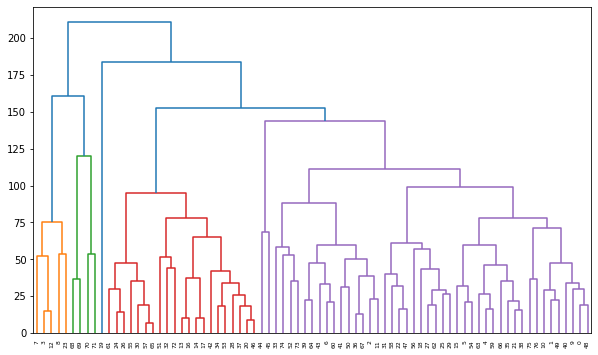

In [504]:
imshow_hac(Z2)